In [1]:
    import numpy as np
    import pandas as pd

In [2]:
data = pd.read_csv('D://BE//dataset//diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Check for null or missing values
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [4]:
#Replace zero values with mean values
for column in data.columns[1:-3]:
    data[column].replace(0, np.NaN, inplace = True)
    data[column].fillna(round(data[column].mean(skipna=True)), inplace = True)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148.0,72.0,35.0,156.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,156.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,156.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,156.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,156.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,156.0,32.0,0.232,54,1


In [5]:

X = data.iloc[:, :8] #Features
Y = data.iloc[:, 8:] #Predictor

In [6]:
#Perform Spliting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_fit = knn.fit(X_train, Y_train.values.ravel())
knn_pred = knn_fit.predict(X_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [8]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(Y_test, knn_pred))
print("Accuracy Score:", accuracy_score(Y_test, knn_pred))
print("Reacal Score:", recall_score(Y_test, knn_pred))
print("F1 Score:", f1_score(Y_test, knn_pred))
print("Precision Score:",precision_score(Y_test, knn_pred))

Confusion Matrix
[[88 19]
 [19 28]]
Accuracy Score: 0.7532467532467533
Reacal Score: 0.5957446808510638
F1 Score: 0.5957446808510638
Precision Score: 0.5957446808510638


In [9]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

from sklearn.metrics import classification_report

In [11]:
y_pred = knn.predict(X_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


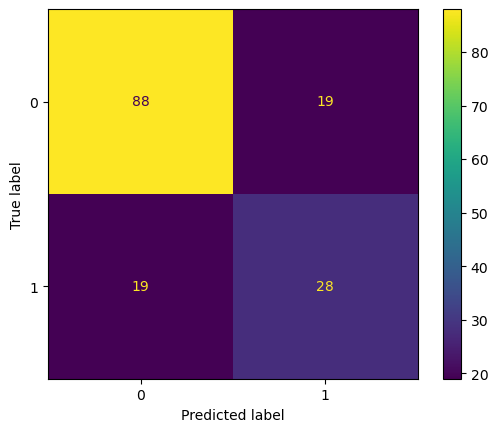

In [12]:
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred)

In [13]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       107
           1       0.60      0.60      0.60        47

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154

